## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df=pd.read_csv("/kaggle/input/ddos-dataset/DDoS.csv")

In [3]:
# df.head()

In [4]:
# df.columns

In [5]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [6]:
# df.columns

In [7]:
#Unique values in the Label target column

# df.loc[:,'Label'].unique()

In [8]:
# def pltNullDistribution(df):
    
#     #Checking the null values in the dataset.
#     plt.figure(1, figsize = (10,4))
#     plt.hist(df.isna().sum())
    
#     # Set the title and axis labels
#     plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
#     plt.title('Null Values Distribution')
#     plt.xlabel('Classes')
#     plt.ylabel('Frequency')

#     # Show the plot
#     plt.show()
    
# pltNullDistribution(df)

In [9]:
# def plotMissingValues(df):
#     missing_values = df.isnull().sum()  # Counting null values for each column
#     fig = plt.figure(figsize=(16, 5))
#     missing_values.plot(kind='bar')
#     plt.xlabel("Features")
#     plt.ylabel("Missing values")
#     plt.title("Total number of Missing values in each feature")
#     plt.show()

# plotMissingValues(df)

The `df.dropna()` method in pandas is used to **remove missing values** (i.e., NaN or None) from a DataFrame. This method can be customized with various parameters to control which rows or columns are removed based on the presence of missing values.

In [10]:
data=df.dropna()

In [11]:
# pltNullDistribution(data)

In [12]:
data.loc[:, :] = data.replace([np.inf, -np.inf], np.nan)


In [13]:
# pltNullDistribution(data)

In [14]:
# data.dtypes

In [15]:
# for col in data.columns:
#     print(data[col].dtype)

In [16]:
data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})

/tmp/ipykernel_34/816821436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'BENIGN': 0, 'DDoS': 1})


In [17]:
# plt.hist(data['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
# plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
# plt.title('Distribution of Labels')
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()

In [18]:
# data.dtypes

In [19]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


## Data Exploring

In [20]:
# data.describe()

### plot distribution

In [21]:
# plt.figure(5)

# for col in data.columns:
#     plt.hist(data[col])
#     plt.title(col)
#     plt.show()

In [22]:
# plotMissingValues(data)

In [23]:
data = data.dropna()


In [24]:
# plotMissingValues(data)

## Test and Train Split

In [25]:
X = data.drop('Label', axis=1)
y = data['Label']

In [26]:
print(X.shape)
print(y.shape)


(225711, 78)
(225711,)


In [27]:
# Convert int64 to int32 and float64 to float32 preserving column-wise types


# column_types = X.dtypes

# for col in X.columns:
#     if np.issubdtype(column_types[col], np.int64):
#         X[col] = X[col].astype(np.int32)
#     elif np.issubdtype(column_types[col], np.float64):
#         X[col] = X[col].astype(np.float32)

In [28]:
# y = y.astype(np.int32)

In [29]:
# y.dtype

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [31]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)


In [32]:
pca = PCA(n_components=0.9999)  # Keep components that explain 95% of variance
X_pca = pca.fit_transform(X)

In [33]:
print(X_pca.shape)

(225711, 16)


In [34]:
df_pca = pd.DataFrame(X_pca)

In [35]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.632317e+07,-177588.423801,-158328.262329,3.274166e+06,-644672.422201,-65463.389477,-2.488349e+06,-531456.758769,-1.182894e+06,104899.535489,-446380.518917,142737.335785,-93787.961034,49604.963162,309929.222305,-144933.157358
1,-3.630598e+07,-175956.557639,-146308.360104,-6.182039e+05,-660559.724999,-66403.655703,-2.500578e+06,-534603.443866,-1.187170e+06,105072.260680,-447060.637402,141890.410990,-92764.147243,48920.885047,302734.783702,-139251.671823
2,-3.630655e+07,-176002.193904,-146668.436860,-4.974704e+05,-660076.496646,-66383.896019,-2.500178e+06,-534520.111556,-1.187064e+06,105027.793887,-447041.723592,141913.063439,-92796.052264,48875.647136,302911.631293,-139380.869902
3,-3.630711e+07,-176054.438479,-147043.488746,-3.752421e+05,-659575.485264,-66353.363288,-2.499773e+06,-534432.441743,-1.186924e+06,105006.069624,-447010.378069,141922.887447,-92827.098214,48875.304477,303062.065968,-139490.686540
4,-3.632317e+07,-177588.424395,-158328.262579,3.274166e+06,-644672.421279,-65463.388671,-2.488349e+06,-531456.761247,-1.182894e+06,104899.533970,-446380.519713,142737.334567,-93787.962860,49604.962672,309929.217333,-144933.151244


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, random_state=42)


In [37]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [38]:
print(X_train.shape)
print(X_test.shape)


(203139, 16)
(22572, 16)


## Training the Model

In [40]:
# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [41]:
# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Random Forest

In [42]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

KeyboardInterrupt: 

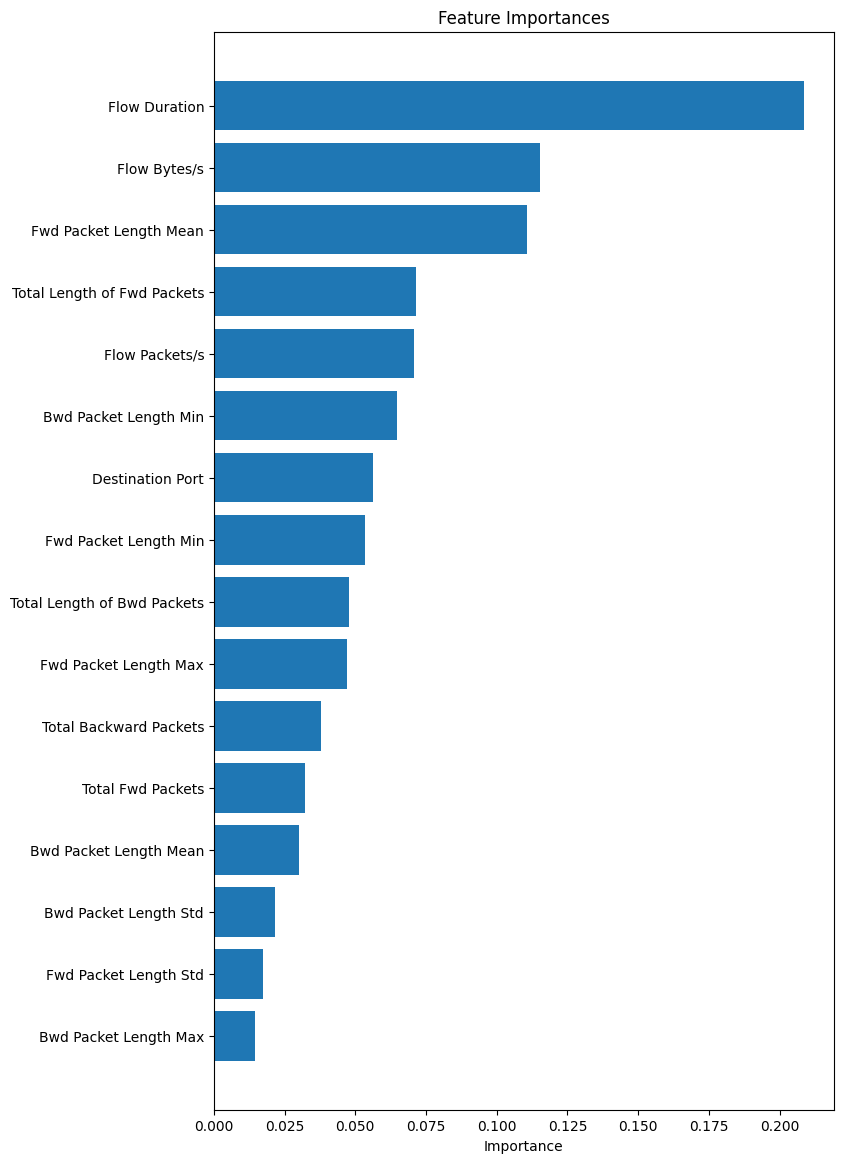

In [35]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"{df.columns[i]}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()




In [ ]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation

In [ ]:
pip install seaborn --upgrade

In [36]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [37]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy: 0.9988
F1 Score: 0.9990
Precision: 0.9997
Recall: 0.9983


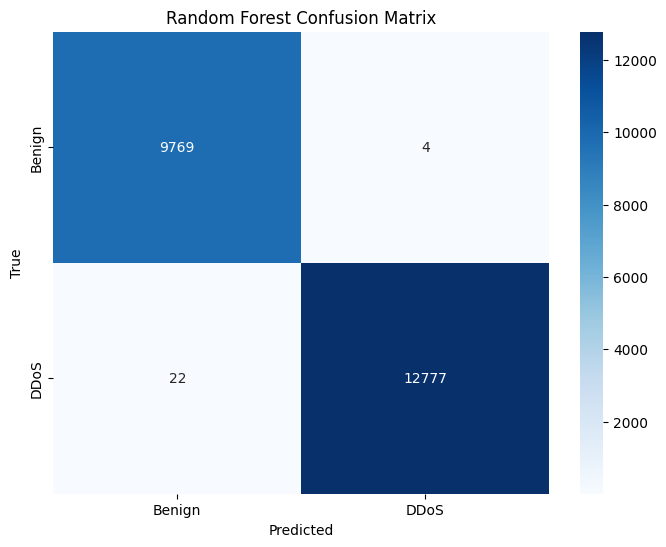

In [38]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

## logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=500))
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# Initialize the SGDClassifier with logistic loss
sgd = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

# Lists to store the loss values and iteration numbers
losses = []
iterations = 600  # Number of iterations for training

# Train the model using partial_fit
for i in range(iterations):
    sgd.partial_fit(X_train_s, y_train, classes=np.unique(y_train))
    loss = sgd.score(X_train_s, y_train)  # Use negative accuracy as a proxy for loss
    losses.append(loss)

# Plot the loss against iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for SGD Logistic Regression')
plt.legend()
plt.show()

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')

In [ ]:
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


## Neural Network

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=600, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

In [ ]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')

In [ ]:
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



# Standardize the data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_s, y_train, epochs=600, batch_size=32, validation_split=0.2, verbose=1)

# Predict
nn_pred = model.predict(X_test_s)
nn_pred = (nn_pred > 0.5).astype(int)  # Convert probabilities to class labels

In [ ]:
print(X.shape)
print(y.shape)

## RNN Model

### Dividing data into window slices

### Sliding Window Function

In [43]:
def create_sliding_windows(data, window_size):
    """
    Create sliding windows from data.
    
    Parameters:
    data (numpy array): The transformed feature data.
    window_size (int): The size of the sliding window.
    
    Returns:
    numpy array: 3D array with shape (num_windows, window_size, num_features).
    """
    num_packets, num_features = data.shape
    num_windows = num_packets - window_size + 1
    
    windows = np.empty((num_windows, window_size, num_features))

    for i in range(num_windows):
        windows[i] = data[i:i + window_size]
    
    return windows

In [44]:
window_size = 100
windows = create_sliding_windows(X_train_s, window_size)

In [46]:
# np.save('windows_data.npy', windows)


In [ ]:
# windows = np.load('windows_data.npy')


In [42]:
windows.shape

(203040, 100, 16)

In [45]:
window_size=100
windows_y = y_train[window_size - 1:]

In [46]:
windows_y

181292    1
195093    0
110551    1
905       0
219935    0
         ..
119895    0
103710    0
131949    1
146884    0
121974    1
Name: Label, Length: 203040, dtype: int64

### Generator Function

In [51]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, labels, window_size, batch_size):
        self.data = data
        self.labels = labels 
        self.window_size = window_size
        self.batch_size = batch_size
        self.num_packets = data.shape[0]
        self.num_windows = self.num_packets - window_size + 1
    
    def __len__(self):
        return int(np.ceil(self.num_windows / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = min((index + 1) * self.batch_size, self.num_windows)
        
        batch_windows = np.empty((end_idx - start_idx, self.window_size, self.data.shape[1]))
        
        for i in range(start_idx, end_idx):
            batch_windows[i - start_idx] = self.data[i:i + self.window_size]
        
        s = self.window_size - 1 + start_idx
        batch_labels = self.labels[s:s+(end_idx - start_idx)]
        
        return batch_windows, batch_labels

In [52]:
# Parameters
window_size = 100
batch_size = 64

# Initialize data generator
train_generator = DataGenerator(X_train_s, y_train, window_size, batch_size)

In [53]:
for batch_idx in range(len(train_generator)):
    batch_x, batch_y = train_generator[batch_idx]
    print(f"Batch {batch_idx}:")
    print(f"  Batch X shape: {batch_x.shape}")
    print(f"  Batch Y shape: {batch_y.shape}")
    print()

Batch 0:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 1:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 2:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 3:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 4:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 5:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 6:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 7:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 8:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 9:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 10:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 11:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 12:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 13:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 14:
  Batch X shape: (64, 100, 16)
  Batch Y shape: (64,)

Batch 15:
  Batch X shape: (64, 100

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

In [55]:
# Define the model architecture
def create_lstm_model(input_shape):
    model = Sequential()
    
    model.add(Input(shape=input_shape))

    # Bidirectional LSTM layers with Batch Normalization after every two layers
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Flatten())

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [56]:
##with generator
input_shape = (window_size, X_train_s.shape[1])


In [44]:
##without generator
input_shape = windows.shape[1:]

NameError: name 'windows' is not defined

In [57]:
with tf.device('/CPU:0'):
    model = create_lstm_model(input_shape)

In [58]:
##With generator
history = model.fit(train_generator, epochs=40, verbose=1)


Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3173/3173 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - accuracy: 0.9095 - loss: 0.2339
Epoch 2/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9839 - loss: 0.0533
Epoch 3/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9873 - loss: 0.0412
Epoch 4/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9895 - loss: 0.0344
Epoch 5/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9894 - loss: 0.0329
Epoch 6/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9899 - loss: 0.0310
Epoch 7/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9907 - loss: 0.0286
Epoch 8/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9915 - loss: 0.0251
Epoch 9/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9923 - loss: 0.0234
Epoch 10/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9923 - loss: 0.0230
Epoch 11/40
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 12/40
3173/31

In [1]:
##without generator
history = model.fit(windows, windows_y, epochs = 40, validation_split=0.2, verbose = 1)


NameError: name 'model' is not defined

In [ ]:
print('hi')